In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn

In [8]:
df=pd.read_csv("./data/final_data/all_hourly_weather_events.csv", delimiter=";")
alarms=pd.read_csv("./data/final_data/alarms.csv",delimiter=";")

In [9]:
df_weather_events = df

In [10]:
df

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,...,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch
0,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195079,"Вінниця, Україна",2023-01-20,1674165600,11.2,5.7,7.9,6.2,89.3,0.600,12.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195080,"Вінниця, Україна",2023-01-20,1674165600,11.2,5.7,7.9,6.2,89.3,0.600,12.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195081,"Вінниця, Україна",2023-01-20,1674165600,11.2,5.7,7.9,6.2,89.3,0.600,12.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195082,"Вінниця, Україна",2023-01-20,1674165600,11.2,5.7,7.9,6.2,89.3,0.600,12.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
alarms=alarms.drop("intersection_alarm_id", axis=1)
alarms=alarms.drop("end", axis=1)

In [5]:
alarms=alarms.drop("id", axis=1)
alarms

,region_id,region_title,region_city,all_region,start,clean_end
0,3,Вінниччина,Вінниця,0,2022-02-25 22:55:42,2022-02-25 23:41:53
1,12,Львівщина,Львів,0,2022-02-26 06:26:17,2022-02-26 07:15:28
2,14,Одещина,Одеса,0,2022-02-26 07:16:58,2022-02-26 07:47:03
3,6,Житомирщина,Житомир,0,2022-02-26 08:05:54,2022-02-26 09:36:36
4,3,Вінниччина,Вінниця,0,2022-02-26 08:39:39,2022-02-26 10:42:41
...,...,...,...,...,...,...
19928,5,️Донеччина,Донецька обл.,1,2023-01-20 22:39:41,2023-01-20 23:18:12
19929,19,Харківщина,Харківська обл.,1,2023-01-20 22:39:52,2023-01-20 23:17:36
19930,15,Полтавщина,Полтавська обл.,1,2023-01-20 22:44:30,2023-01-20 23:17:22
19931,17,Сумщина,Сумська обл.,1,2023-01-20 22:47:57,2023-01-20 23:22:34


In [6]:
alarms["start_date"]=alarms["start"].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
alarms["start_time"]=alarms["start"].apply(lambda x:datetime.strptime('2023-01-01 ' + str(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time()), "%Y-%m-%d %H:%M:%S"))
alarms=alarms.dropna()
alarms["end_date"]=alarms["clean_end"].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
alarms["end_time"]=alarms["clean_end"].apply(lambda x:datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time())
alarms['start'] = pd.to_datetime(alarms['start'])
alarms['clean_end'] = pd.to_datetime(alarms['clean_end'])
alarms['start_date'] = pd.to_datetime(alarms['start_date'])
alarms['end_date'] = pd.to_datetime(alarms['end_date'])

C:\Users\Богдан\AppData\Local\Temp\ipykernel_2176\4028062900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alarms["end_date"]=alarms["clean_end"].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
C:\Users\Богдан\AppData\Local\Temp\ipykernel_2176\4028062900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alarms["end_time"]=alarms["clean_end"].apply(lambda x:datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time())
C:\Users\Богдан\AppData\Local\Temp\ipykernel_2176\4028062900.py:6: Settin

In [7]:
alarms['start_time'] = pd.to_datetime(alarms['start_time'])

C:\Users\Богдан\AppData\Local\Temp\ipykernel_2176\3198515541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alarms['start_time'] = pd.to_datetime(alarms['start_time'])


In [8]:
result=[]
for i in range(0, len(alarms)):
    ans=(alarms["clean_end"][i] - alarms["start"][i])
    result.append(ans.total_seconds()/3600)
alarms["length(hours)"]=result

C:\Users\Богдан\AppData\Local\Temp\ipykernel_2176\2599838648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alarms["length(hours)"]=result


In [9]:
alarms.head(100)

,region_id,region_title,region_city,all_region,start,clean_end,start_date,start_time,end_date,end_time,length(hours)
0,3,Вінниччина,Вінниця,0,2022-02-25 22:55:42,2022-02-25 23:41:53,2022-02-25,2023-01-01 22:55:42,2022-02-25,23:41:53,0.769722
1,12,Львівщина,Львів,0,2022-02-26 06:26:17,2022-02-26 07:15:28,2022-02-26,2023-01-01 06:26:17,2022-02-26,07:15:28,0.819722
2,14,Одещина,Одеса,0,2022-02-26 07:16:58,2022-02-26 07:47:03,2022-02-26,2023-01-01 07:16:58,2022-02-26,07:47:03,0.501389
3,6,Житомирщина,Житомир,0,2022-02-26 08:05:54,2022-02-26 09:36:36,2022-02-26,2023-01-01 08:05:54,2022-02-26,09:36:36,1.511667
4,3,Вінниччина,Вінниця,0,2022-02-26 08:39:39,2022-02-26 10:42:41,2022-02-26,2023-01-01 08:39:39,2022-02-26,10:42:41,2.050556
...,...,...,...,...,...,...,...,...,...,...,...
95,4,Дніпропетровщина,Кривий Ріг,0,2022-02-28 23:29:01,2022-02-28 23:52:14,2022-02-28,2023-01-01 23:29:01,2022-02-28,23:52:14,0.386944
96,9,Київщина,Київ,0,2022-03-01 02:29:23,2022-03-01 02:42:40,2022-03-01,2023-01-01 02:29:23,2022-03-01,02:42:40,0.221389
97,3,Вінниччина,Вінниця,0,2022-03-01 04:45:41,2022-03-01 05:31:16,2022-03-01,2023-01-01 04:45:41,2022-03-01,05:31:16,0.759722
98,16,Рівненщина,Рівненська обл.,1,2022-03-01 05:15:46,2022-03-01 05:26:45,2022-03-01,2023-01-01 05:15:46,2022-03-01,05:26:45,0.183056


In [10]:
reg=['Xарківщина','Донеччина', 'Миколаївщина','Запоріжжя','Одещина',"Херсонщина",'Дніпропетровщина','Кіровоградщина','Сумщина','Полтавщина','Черкащина','Вінниччина','Київщина','Чернігівщина','Хмельниччина','Житомирщина','Тернопільщина','Івано-Франківщина','Рівненщина','Закарпаття','Львівщина','Волинь','Буковина']

In [11]:
def calculate_total_time(data):
    result1=[]
    result2=[]
    for p in reg:
        df_new=data[data['region_title']==p]
        result1.append(sum(df_new["length(hours)"]))
        result2.append(p)
    result=pd.DataFrame()
    result["name"]=result2
    result["length_total"]=result1
    return result

In [12]:
dict=calculate_total_time(alarms)

In [13]:
dict

,name,length_total
0,Xарківщина,0.000000
1,Донеччина,0.000000
2,Миколаївщина,1418.485000
3,Запоріжжя,1092.254722
4,Одещина,652.150000
5,Херсонщина,359.093333
6,Дніпропетровщина,1265.776667
7,Кіровоградщина,920.606667
8,Сумщина,684.986111
9,Полтавщина,891.295278


In [14]:
weather=pd.read_csv("all_weather_by_hour.csv")

In [15]:
weather=weather.filter(["city_resolvedAddress","city_address","day_datetime","day_feelslike","day_humidity","day_precip","day_snowdepth","day_windspeed","day_winddir","day_cloudcover","day_visibility","day_sunrise","day_sunset","day_preciptype","hour_datetime","hour_feelslike","hour_humidity","hour_snowdepth","hour_windspeed","hour_winddir","hour_visibility","hour_cloudcover","hour_conditions"])
weather.head(10)

,city_resolvedAddress,city_address,day_datetime,day_feelslike,day_humidity,day_precip,day_snowdepth,day_windspeed,day_winddir,day_cloudcover,...,day_preciptype,hour_datetime,hour_feelslike,hour_humidity,hour_snowdepth,hour_windspeed,hour_winddir,hour_visibility,hour_cloudcover,hour_conditions
0,"Черкаси, Україна","Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,00:00:00,0.9,75.73,0.0,4.0,132.0,24.1,89.0,Partially cloudy
1,"Черкаси, Україна","Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,01:00:00,0.6,77.96,0.0,3.6,147.9,24.1,71.1,Partially cloudy
2,"Черкаси, Україна","Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,02:00:00,0.4,82.08,0.0,3.2,198.2,24.1,95.4,Overcast
3,"Черкаси, Україна","Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,03:00:00,0.2,83.28,0.0,2.9,202.3,24.1,74.6,Partially cloudy
4,"Черкаси, Україна","Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,04:00:00,0.0,83.87,0.0,2.9,203.6,24.1,67.8,Partially cloudy
5,"Черкаси, Україна","Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,05:00:00,-0.1,83.86,0.0,1.8,197.5,24.1,94.1,Overcast
6,"Черкаси, Україна","Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,06:00:00,0.0,83.87,0.0,1.1,199.2,24.1,100.0,Overcast
7,"Черкаси, Україна","Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,07:00:00,0.0,83.87,0.0,1.4,221.7,0.2,97.9,Overcast
8,"Черкаси, Україна","Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,08:00:00,0.1,87.68,0.0,3.2,245.3,0.1,90.8,Overcast
9,"Черкаси, Україна","Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,09:00:00,1.4,85.91,0.0,2.5,247.0,0.1,73.3,Partially cloudy


In [16]:
weather["city_resolvedAddress"]=weather["city_resolvedAddress"].apply(lambda x:x.split(", ")[0])
weather=weather.rename(columns={"city_resolvedAddress":"region_city"})
weather.head(10)

,region_city,city_address,day_datetime,day_feelslike,day_humidity,day_precip,day_snowdepth,day_windspeed,day_winddir,day_cloudcover,...,day_preciptype,hour_datetime,hour_feelslike,hour_humidity,hour_snowdepth,hour_windspeed,hour_winddir,hour_visibility,hour_cloudcover,hour_conditions
0,Черкаси,"Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,00:00:00,0.9,75.73,0.0,4.0,132.0,24.1,89.0,Partially cloudy
1,Черкаси,"Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,01:00:00,0.6,77.96,0.0,3.6,147.9,24.1,71.1,Partially cloudy
2,Черкаси,"Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,02:00:00,0.4,82.08,0.0,3.2,198.2,24.1,95.4,Overcast
3,Черкаси,"Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,03:00:00,0.2,83.28,0.0,2.9,202.3,24.1,74.6,Partially cloudy
4,Черкаси,"Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,04:00:00,0.0,83.87,0.0,2.9,203.6,24.1,67.8,Partially cloudy
5,Черкаси,"Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,05:00:00,-0.1,83.86,0.0,1.8,197.5,24.1,94.1,Overcast
6,Черкаси,"Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,06:00:00,0.0,83.87,0.0,1.1,199.2,24.1,100.0,Overcast
7,Черкаси,"Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,07:00:00,0.0,83.87,0.0,1.4,221.7,0.2,97.9,Overcast
8,Черкаси,"Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,08:00:00,0.1,87.68,0.0,3.2,245.3,0.1,90.8,Overcast
9,Черкаси,"Cherkasy,Ukraine",2022-02-24,1.6,83.4,0.0,0.0,8.3,47.6,69.4,...,rain,09:00:00,1.4,85.91,0.0,2.5,247.0,0.1,73.3,Partially cloudy


In [37]:
#df_new = pd.concat([weather["day_feelslike"], alarms["start_time"]], axis=1)

In [38]:
#alarms=pd.read_csv("./all_data_final/all_hourly_weather_events.csv", encoding='iso-8859-1', delimiter=";")
#Lutsk_rows = df_merged[df_merged['city_resolvedAddress'] == 'Луцьк, Луцький район, Україна']

D:\EEB\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.draw()


D:\EEB\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  func(*args, **kwargs)
D:\EEB\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


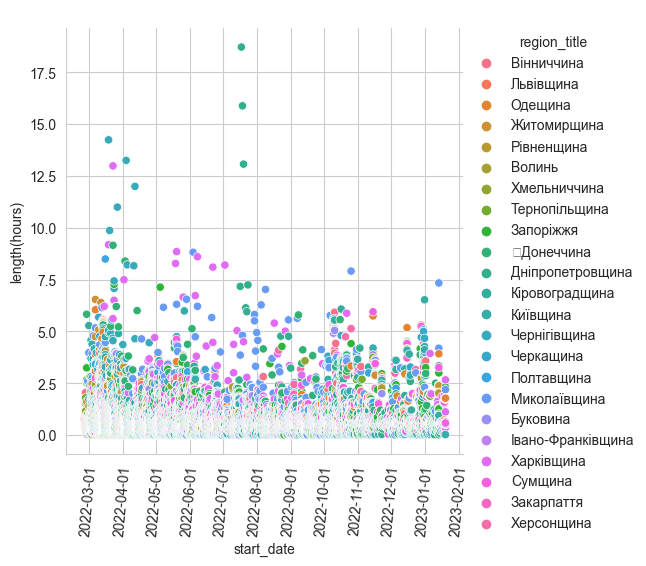

In [17]:
plot1=seaborn.relplot(kind="scatter",data=alarms,x="start_date",y="length(hours)", hue="region_title")
plot1.set_xticklabels(rotation=85)

In [117]:
seaborn.relplot(kind="scatter",data=alarms,x="start_date",y="length(hours)")

Text(0.5, 9.444444444444438, 'Regions')

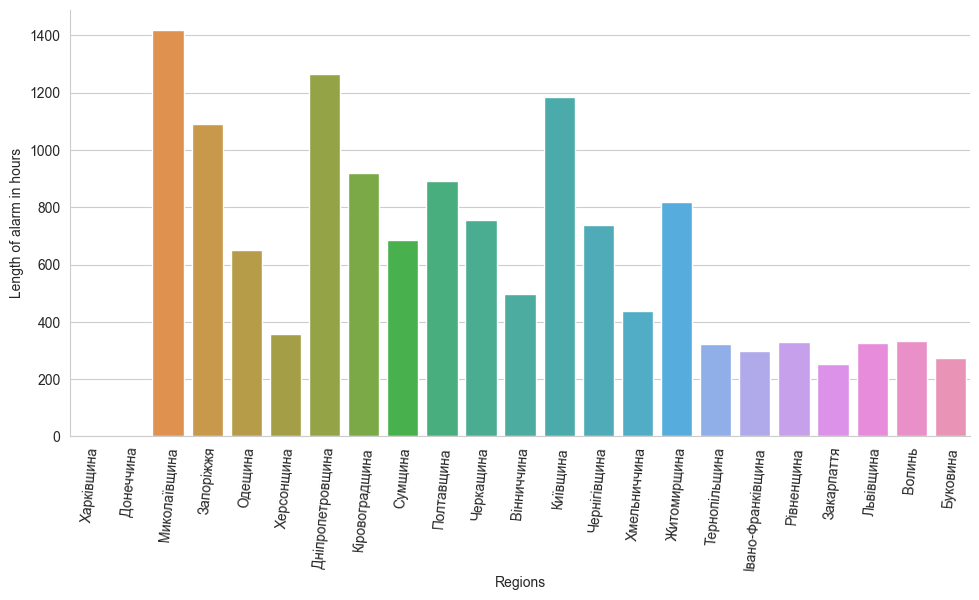

In [88]:
plot=seaborn.catplot(x="name",y="length_total", kind="bar", data=dict, height=5, aspect=2)
plot.set_xticklabels(rotation=85)
plt.ylabel('Length of alarm in hours')
plt.xlabel('Regions')

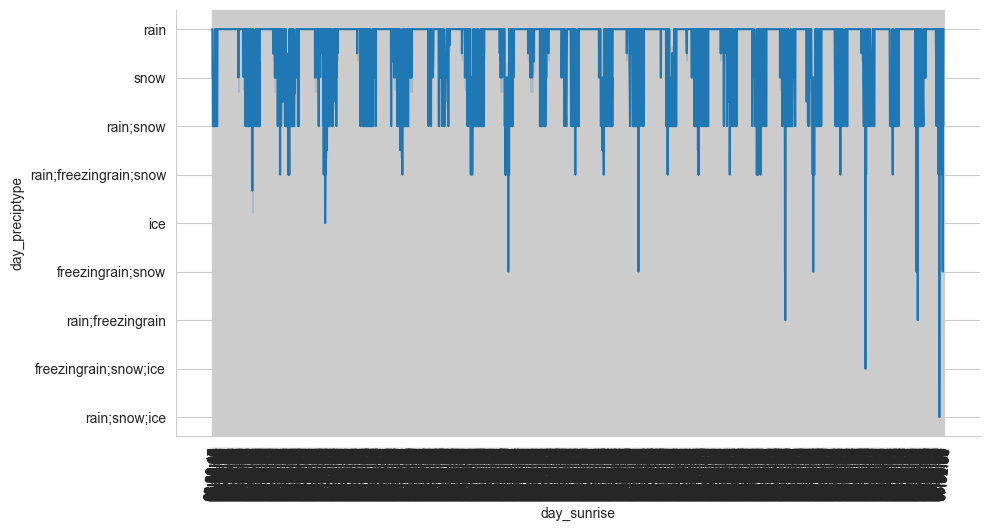

In [51]:
plot=seaborn.relplot(x="day_sunrise",y="day_preciptype", kind="line", data=weather, height=5, aspect=2)
plot.set_xticklabels(rotation=85)


#["city_resolvedAddress","city_address","day_datetime","day_feelslike","day_humidity","day_precip","day_snowdepth","day_windspeed","day_winddir","day_cloudcover","day_visibility","day_sunrise","day_sunset","day_preciptype","hour_datetime","hour_feelslike","hour_humidity","hour_snowdepth","hour_windspeed","hour_winddir","hour_visibility","hour_cloudcover","hour_conditions"]

In [40]:

# Convert "clean_end" column to date and time separately, handling NaN values
result = []
for i in range(len(df)):
    if not pd.isna(df["event_clean_end"][i]):
        q=datetime.strptime(str(df["event_clean_end"][i]), "%Y-%m-%d %H:%M:%S")
        b=datetime.strptime(str(df["event_start"][i]), "%Y-%m-%d %H:%M:%S")
        ans = (q - b)
        result.append(ans.total_seconds() / 3600)
    else:
        result.append(None)
df["length(hours)"] = result

In [41]:
df["length(hours)"]=df["length(hours)"].fillna(0)

In [46]:
df.head(10)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,...,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,length(hours)
0,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


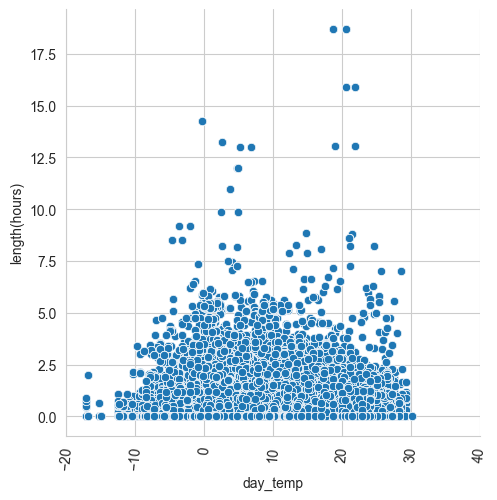

In [52]:
plot1=seaborn.relplot(kind="scatter",data=df,x="day_temp",y="length(hours)")
plot1.set_xticklabels(rotation=85)

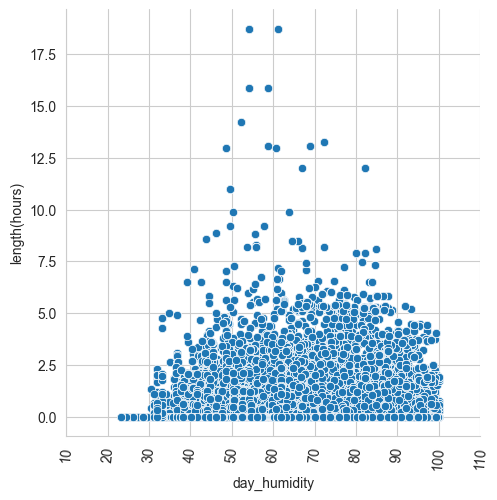

In [53]:
plot1=seaborn.relplot(kind="scatter",data=df,x="day_humidity",y="length(hours)")
plot1.set_xticklabels(rotation=85)